<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABD/blob/main/%D0%93%D0%90_%D1%82%D1%80%D0%B0%D0%BD%D1%81%D0%BF_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ГА_трансп_задача

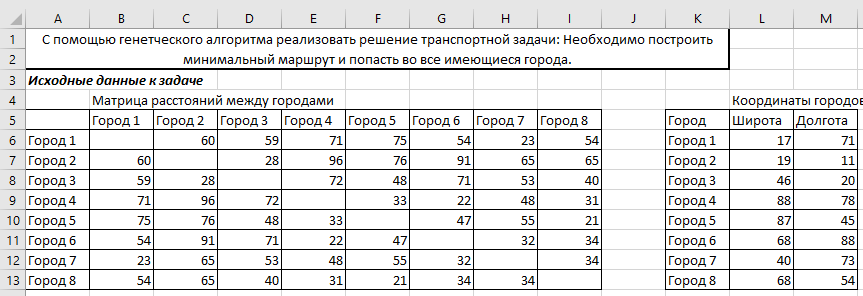

In [4]:
import random
import numpy as np

# Исходные данные
cities = {
    "Город 1": (17, 71),
    "Город 2": (19, 11),
    "Город 3": (46, 20),
    "Город 4": (88, 78),
    "Город 5": (87, 45),
    "Город 6": (68, 88),
    "Город 7": (40, 73),
    "Город 8": (68, 54)
}

distances = [
    [0, 60, 59, 71, 75, 54, 23, 54],
    [60, 0, 28, 96, 76, 91, 65, 65],
    [59, 28, 0, 72, 48, 71, 53, 40],
    [71, 96, 72, 0, 33, 22, 48, 31],
    [75, 76, 48, 33, 0, 47, 55, 21],
    [54, 91, 71, 22, 47, 0, 32, 34],
    [23, 65, 53, 48, 55, 32, 0, 34],
    [54, 65, 40, 31, 21, 34, 34, 0]
]

# Функция вычисления расстояния между городами по координатам
def calculate_distance(city1, city2):
    x1, y1 = city_coordinates[city1]
    x2, y2 = city_coordinates[city2]
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Функция вычисления расстояния между городами в маршруте
def calculate_route_distance(route):
    distance = 0
    for i in range(len(route) - 1):
        city1 = route[i]
        city2 = route[i + 1]
        distance += distances[city1][city2]
    return distance

# Функция создания начальной популяции
def create_initial_population(population_size, num_cities):
    population = []
    for _ in range(population_size):
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)
    return population

# Оператор кроссовера (обмен генами)
def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child1 = parent1[:crossover_point] + [city for city in parent2 if city not in parent1[:crossover_point]]
    child2 = parent2[:crossover_point] + [city for city in parent1 if city not in parent2[:crossover_point]]
    return child1, child2

# Оператор мутации (перестановка двух городов)
def mutate(route):
    city1, city2 = random.sample(range(len(route)), 2)
    route[city1], route[city2] = route[city2], route[city1]
    return route

# Генетический алгоритм
def genetic_algorithm(population_size, num_generations, crossover_rate, mutation_rate):
    num_cities = len(distances)
    population = create_initial_population(population_size, num_cities)
    best_route = None
    best_distance = float('inf')
    for generation in range(num_generations):
        # Вычисление приспособленности для каждого маршрута
        fitness_scores = [1 / calculate_route_distance(route) for route in population]
        # Выбор лучших решений
        sorted_population = [route for _, route in sorted(zip(fitness_scores, population), reverse=True)]
        if calculate_route_distance(sorted_population[0]) < best_distance:
            best_route = sorted_population[0]
            best_distance = calculate_route_distance(best_route)
            print(f"Generation {generation + 1}, Best Distance: {best_distance}")
        # Селекция и создание нового поколения
        new_population = []
        while len(new_population) < population_size:
            parent1 = random.choices(sorted_population, weights=fitness_scores)[0]
            parent2 = random.choices(sorted_population, weights=fitness_scores)[0]
            if random.random() < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
                new_population.extend([child1, child2])
            else:
                new_population.extend([parent1, parent2])
        # Мутация
        for i in range(len(new_population)):
            if random.random() < mutation_rate:
                new_population[i] = mutate(new_population[i])
        population = new_population
    return best_route

# Параметры генетического алгоритма
population_size = 100
num_generations = 1000
crossover_rate = 0.8
mutation_rate = 0.2

# Запуск генетического алгоритма
best_route = genetic_algorithm(population_size, num_generations, crossover_rate, mutation_rate)
print("Best Route:", best_route)
print("Best Distance:", calculate_route_distance(best_route))

Generation 1, Best Distance: 258
Generation 6, Best Distance: 244
Generation 22, Best Distance: 229
Generation 23, Best Distance: 222
Generation 76, Best Distance: 221
Generation 214, Best Distance: 219
Generation 284, Best Distance: 218
Generation 297, Best Distance: 199
Best Route: [1, 2, 7, 4, 3, 5, 6, 0]
Best Distance: 199


Код состоить из следующих шагов:

1. **Импорт библиотек**:
   - `random`: используется для генерации случайных чисел, необходимых для начальной популяции и операторов мутации и скрещивания.
   - `numpy`: используется для вычисления расстояния между городами с помощью функции `sqrt()`.

2. **Исходные данные**:
   - `distances`: матрица расстояний между городами.
   - `city_coordinates`: словарь, содержащий координаты каждого города.

3. **Функция вычисления расстояния между городами по координатам**:
   - `calculate_distance(city1, city2)`: вычисляет расстояние между двумя городами, используя координаты из `city_coordinates`.

4. **Функция вычисления расстояния между городами в маршруте**:
   - `calculate_route_distance(route)`: вычисляет общее расстояние, пройденное по заданному маршруту, суммируя расстояния между последовательными городами.

5. **Функция создания начальной популяции**:
   - `create_initial_population(population_size, num_cities)`: создает начальную популяцию маршрутов, где каждый маршрут представляет собой случайно упорядоченный список городов.

6. **Оператор кроссовера (обмен генами)**:
   - `crossover(parent1, parent2)`: создает два новых маршрута (потомков) путем комбинирования части маршрута из одного родителя и оставшихся городов из другого родителя.

7. **Оператор мутации (перестановка двух городов)**:
   - `mutate(route)`: изменяет маршрут путем перестановки двух случайно выбранных городов.

8. **Генетический алгоритм**:
   - `genetic_algorithm(population_size, num_generations, crossover_rate, mutation_rate)`: реализует основной цикл генетического алгоритма:
     - Вычисляет приспособленность каждого маршрута в популяции (обратно пропорциональную общему расстоянию).
     - Выбирает лучшие маршруты и обновляет лучший найденный маршрут.
     - Создает новую популяцию путем селекции, скрещивания и мутации.
     - Повторяет процесс в течение заданного количества поколений.

9. **Параметры генетического алгоритма**:
   - `population_size`: размер популяции.
   - `num_generations`: количество поколений.
   - `crossover_rate`: вероятность применения оператора кроссовера.
   - `mutation_rate`: вероятность применения оператора мутации.

10. **Запуск генетического алгоритма**:
    - Вызывает функцию `genetic_algorithm()` с указанными параметрами.
    - Выводит лучший найденный маршрут и его общее расстояние.

Основная идея этого кода - использовать генетический алгоритм для решения задачи коммивояжера, т.е. нахождения кратчайшего маршрута, проходящего через все города и возвращающегося в исходный город. Генетический алгоритм моделирует процесс естественного отбора и эволюции, чтобы найти оптимальное решение.